#  CIFAR 10 Project -PCA, Classification, and Model Selection
(pronounced "see far")

Let's Use your Code from Assignment 3 and the CIFAR10 data to do some compression and Classification

1) First Use PCA (Scikit Learn or the by hand method we showed ) to compress the data down conserving 90% of the variance.  What are the dimensions of the old Data set vs the new?

2) Next we are going to do some evaluation of different Scaling, Classifiers and hyper-parameters.  Pipeline may come in handy but there are other ways to do it. For each of these below I want a Training Test score and a 3-fold Cross-Validation score.

* Scalers- Standard, just divide by max
* Classifiers [MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) and [SGDClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) So we are getting the same answers fix (max_iter=500,alpha=?????,random_state=42) let the rest of the options go to defaults.
* hyper-parameters $\alpha= .00001,.00003,.00005,.00007$


A few warnings and suggestions. One run for one scaling and both classifiers at $\alpha=.00005$ took 14 minutes and I have a pretty decent machine. So:

* You may want to divide this up so you are not re-loading the data and preforming PCA every time.  Careful if you self reference like X_red=(X_red)/np.max(X_red).

* Probably should get it running for one alpha first and one scaling.  I think .00001 trains the fastest for me but you may want to try something even smaller.

You can still do this in a Jupyter notebook.  In the end I would like your code and a separate  professionally written write up  that addresses the following.

Summarize your results in a table (or data frame)


1) What is the best combination of scaling, classifier and hyper-parameter  by cross validation average score?

2) Are you observing anything as $\alpha$ increases? 

3) What are some ways you might increase your accuracy?  What price might you pay?

**FYI:** My accuracy results were roughly between .25 and.80 for all cross validations and training scores.  This seems low but better than random guessing.

**Challenge problem.**  Compute Confusion matrix for the best combination model above and see what gets misclassified the most and as what. 

**Reading in and formatting CIFAR**

In [1]:
%run packages.py
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [4]:
import os
cd= "C://Users//sam2146//Documents//DSC 521//Assignments//cifar-10-batches-py"
os.chdir(cd)
os.getcwd()
from six.moves import cPickle
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = cPickle.load(fo, encoding='latin-1')
    return dict


In [5]:
data_batch_1= unpickle('data_batch_1')
data_batch_2= unpickle('data_batch_2')
data_batch_3= unpickle('data_batch_3')
data_batch_4= unpickle('data_batch_4')
data_batch_5= unpickle('data_batch_5')
test_batch= unpickle('test_batch')

In [27]:
type(data_batch_1['data'])

numpy.ndarray

In [15]:
x1=data_batch_1['data']
x2=data_batch_2['data']
x3=data_batch_3['data']
x4=data_batch_4['data']
x5=data_batch_5['data']
X_test=test_batch['data']
y1=pd.DataFrame(data_batch_1['labels']).values
y2=pd.DataFrame(data_batch_2['labels']).values
y3=pd.DataFrame(data_batch_3['labels']).values
y4=pd.DataFrame(data_batch_4['labels']).values
y5=pd.DataFrame(data_batch_5['labels']).values
y_test=pd.DataFrame(test_batch['labels']).values

In [16]:
X_train=np.concatenate((x1,x2,x3,x4,x5),axis=0)
y_train=np.concatenate((y1,y2,y3,y4,y5),axis=0)

In [31]:
X_train[0].shape

(3072,)

In [11]:
y_train=y_train.ravel()
y_test=y_test.ravel()

In [12]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(50000, 3072)
(50000,)
(10000, 3072)
(10000,)


**PCA Compression**

In [13]:
pca=PCA()
pca.fit(X_train)
csum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(csum>=.90)+1
d

99

In [14]:
pca=PCA(n_components=d)
X_train_reduced=pca.fit_transform(X_train)
X_train.shape, X_train_reduced.shape

((50000, 3072), (50000, 99))

In [15]:
pca=PCA()
pca.fit(X_test)
csum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(csum>=.90)+1
d

97

In [16]:
pca=PCA(n_components=d)
X_test_reduced=pca.transform(X_test)
X_test.shape, X_test_reduced.shape

((10000, 3072), (10000, 97))

**Standard Scale**

In [17]:
sc=StandardScaler()
X_train_red_ss=sc.fit_transform(X_train_reduced)
X_test_red_ss=sc.fit_transform(X_test_reduced)

**Divide by Max**

In [18]:
X_train_red_max=X_train_reduced/np.max(X_train_reduced)
X_test_red_max=X_test_reduced/np.max(X_test_reduced)

**MLP Classifier and cross validation with standard scaler**

Alpha=.00001

In [41]:
mlp=MLPClassifier(max_iter=500, alpha=.00001 ,random_state=42)
mlp.fit(X_train_red_ss,y_train)
mlp.score(X_train_red_ss,y_train)

0.65634

In [42]:
scores=cross_val_score(mlp, X_train_red_ss, y_train, cv=3, scoring="accuracy")
print("scores", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores [0.48296341 0.48284343 0.48307323]
Accuracy: 0.48 (+/- 0.00)


Alpha=.00003

In [21]:
mlp=MLPClassifier(max_iter=500, alpha=.00003 ,random_state=42)
mlp.fit(X_train_red_ss,y_train)
mlp.score(X_train_red_ss,y_train)

0.65828

In [22]:
scores=cross_val_score(mlp, X_train_red_ss, y_train, cv=3, scoring="accuracy")
print("scores", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores [0.47582484 0.48080384 0.48541417]
Accuracy: 0.48 (+/- 0.01)


Alpha=.00005

In [23]:
mlp=MLPClassifier(max_iter=500, alpha=.00005 ,random_state=42)
mlp.fit(X_train_red_ss,y_train)
mlp.score(X_train_red_ss,y_train)

0.65954

In [24]:
scores=cross_val_score(mlp, X_train_red_ss, y_train, cv=3, scoring="accuracy")
print("scores", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores [0.47912418 0.48008398 0.48547419]
Accuracy: 0.48 (+/- 0.01)


Alpha=.00007

In [27]:
mlp=MLPClassifier(max_iter=500, alpha=.00007 ,random_state=42)
mlp.fit(X_train_red_ss,y_train)
mlp.score(X_train_red_ss,y_train)

0.65632

In [28]:
scores=cross_val_score(mlp, X_train_red_ss, y_train, cv=3, scoring="accuracy")
print("scores", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores [0.48104379 0.48326335 0.48619448]
Accuracy: 0.48 (+/- 0.00)


**MLP Classifier and cross validation with max scaler**

Alpha=.00001

In [31]:
mlp=MLPClassifier(max_iter=500, alpha=.00001 ,random_state=42)
mlp.fit(X_train_red_max,y_train)
mlp.score(X_train_red_max,y_train)

0.6424

In [32]:
scores=cross_val_score(mlp, X_train_red_max, y_train, cv=3, scoring="accuracy")
print("scores", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores [0.50659868 0.50431914 0.51410564]
Accuracy: 0.51 (+/- 0.01)


Alpha=.00003

In [33]:
mlp=MLPClassifier(max_iter=500, alpha=.00003 ,random_state=42)
mlp.fit(X_train_red_max,y_train)
mlp.score(X_train_red_max,y_train)

0.6462

In [34]:
scores=cross_val_score(mlp, X_train_red_max, y_train, cv=3, scoring="accuracy")
print("scores", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores [0.50563887 0.51037792 0.5120048 ]
Accuracy: 0.51 (+/- 0.01)


Alpha=.00005

In [35]:
mlp=MLPClassifier(max_iter=500, alpha=.00005 ,random_state=42)
mlp.fit(X_train_red_max,y_train)
mlp.score(X_train_red_max,y_train)

0.64382

In [36]:
scores=cross_val_score(mlp, X_train_red_max, y_train, cv=3, scoring="accuracy")
print("scores", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores [0.5079784  0.50869826 0.50876351]
Accuracy: 0.51 (+/- 0.00)


Alpha=.00007

In [37]:
mlp=MLPClassifier(max_iter=500, alpha=.00007 ,random_state=42)
mlp.fit(X_train_red_max,y_train)
print(mlp.score(X_train_red_max,y_train))

0.6425


In [38]:
scores=cross_val_score(mlp, X_train_red_max, y_train, cv=3, scoring="accuracy")
print("scores", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores [0.50773845 0.50929814 0.51110444]
Accuracy: 0.51 (+/- 0.00)


**SGD Classifier and cross validation with standard scaler**

Alpha=.00001

In [19]:
sgd=SGDClassifier(max_iter=500,alpha=.0001, random_state=42)
sgd.fit(X_train_red_ss,y_train)
sgd.score(X_train_red_ss,y_train)

0.31098

In [20]:
scores=cross_val_score(sgd, X_train_red_ss, y_train, cv=3, scoring="accuracy")
print("scores", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores [0.31373725 0.30455909 0.30552221]
Accuracy: 0.31 (+/- 0.01)


Alpha=.00003

In [21]:
sgd=SGDClassifier(max_iter=500,alpha=.0003, random_state=42)
sgd.fit(X_train_red_ss,y_train)
sgd.score(X_train_red_ss,y_train)

0.3108

In [22]:
scores=cross_val_score(sgd, X_train_red_ss, y_train, cv=3, scoring="accuracy")
print("scores", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores [0.31145771 0.3085183  0.3027611 ]
Accuracy: 0.31 (+/- 0.01)


Alpha=.00005

In [23]:
sgd=SGDClassifier(max_iter=500,alpha=.0005, random_state=42)
sgd.fit(X_train_red_ss,y_train)
sgd.score(X_train_red_ss,y_train)

0.3141

In [24]:
scores=cross_val_score(sgd, X_train_red_ss, y_train, cv=3, scoring="accuracy")
print("scores", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores [0.31673665 0.3109778  0.30408163]
Accuracy: 0.31 (+/- 0.01)


Alpha=.00007

In [25]:
sgd=SGDClassifier(max_iter=500,alpha=.0007, random_state=42)
sgd.fit(X_train_red_ss,y_train)
sgd.score(X_train_red_ss,y_train)

0.3142

In [26]:
scores=cross_val_score(sgd, X_train_red_ss, y_train, cv=3, scoring="accuracy")
print("scores", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores [0.31073785 0.30977804 0.31062425]
Accuracy: 0.31 (+/- 0.00)


**SGD Classifier and cross validation with max scaler**

Alpha=.00001

In [27]:
sgd=SGDClassifier(max_iter=500,alpha=.0001, random_state=42)
sgd.fit(X_train_red_max,y_train)
sgd.score(X_train_red_max,y_train)

0.32566

In [28]:
scores=cross_val_score(sgd, X_train_red_max, y_train, cv=3, scoring="accuracy")
print("scores", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores [0.27138572 0.28668266 0.30330132]
Accuracy: 0.29 (+/- 0.03)


Alpha=.00003

In [29]:
sgd=SGDClassifier(max_iter=500,alpha=.0003, random_state=42)
sgd.fit(X_train_red_max,y_train)
sgd.score(X_train_red_max,y_train)

0.30414

In [30]:
scores=cross_val_score(sgd, X_train_red_max, y_train, cv=3, scoring="accuracy")
print("scores", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores [0.26190762 0.28680264 0.29813926]
Accuracy: 0.28 (+/- 0.03)


Alpha=.00005

In [26]:
sgd=SGDClassifier(max_iter=500,alpha=.0005, random_state=42)
sgd.fit(X_train_red_max,y_train)
sgd.score(X_train_red_max,y_train)

0.32016

In [27]:
scores=cross_val_score(sgd, X_train_red_max, y_train, cv=3, scoring="accuracy")
print("scores", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores [0.29160168 0.29820036 0.31620648]
Accuracy: 0.30 (+/- 0.02)


Alpha=.00007

In [28]:
sgd=SGDClassifier(max_iter=500,alpha=.0007, random_state=42)
sgd.fit(X_train_red_max,y_train)
sgd.score(X_train_red_max,y_train)

0.32662

In [29]:
scores=cross_val_score(sgd, X_train_red_max, y_train, cv=3, scoring="accuracy")
print("scores", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores [0.26790642 0.25830834 0.27268908]
Accuracy: 0.27 (+/- 0.01)


**Cross Validation with test data**

In [40]:
mlp=MLPClassifier(max_iter=500, alpha=.00005 ,random_state=42)
mlp.fit(X_train_red_max,y_train)
mlp.score(X_train_red_max,y_train)

0.64382

In [41]:
scores=cross_val_score(mlp, X_test_red_max, y_test, cv=3, scoring="accuracy")
print("scores", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores [0.43502994 0.42582583 0.43393393]
Accuracy: 0.43 (+/- 0.01)


In [42]:
y_test_pred = cross_val_predict(mlp, X_test_red_max, y_test, cv=3)

[[490  45  88  31  38  24  24  39 160  61]
 [ 50 522  18  33  19  26  27  36  78 191]
 [ 83  25 298  86 177  90 103  84  25  29]
 [ 39  28  78 293  70 205 118  80  30  59]
 [ 48  15 144  68 390  57 140  80  35  23]
 [ 29  23  97 181  68 338  78 107  35  44]
 [ 14  21  93 102 118  62 514  36  23  17]
 [ 46  27  73  79 108  88  35 470  22  52]
 [135  66  29  38  29  30  10  22 556  85]
 [ 51 185  28  50  30  36  21  51 103 445]]


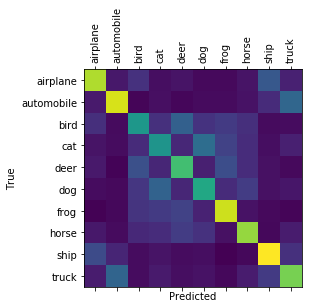

In [86]:
conf_mx=confusion_matrix(y_test, y_test_pred)
print(conf_mx)

labels =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
ticks=(np.arange(10))

fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(conf_mx)
plt.xticks(ticks,labels, rotation=90)

plt.yticks(ticks,labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



In [87]:
mlp=MLPClassifier(max_iter=500, alpha=.00007 ,random_state=42)
mlp.fit(X_train_red_max,y_train)
mlp.score(X_train_red_max,y_train)

0.6425

In [88]:
scores=cross_val_score(mlp, X_test_red_max, y_test, cv=3, scoring="accuracy")
print("scores", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores [0.43982036 0.42432432 0.43933934]
Accuracy: 0.43 (+/- 0.01)


In [89]:
from sklearn.model_selection import cross_val_predict
y_test_pred = cross_val_predict(mlp, X_test_red_max, y_test, cv=3)

[[497  43  82  31  42  25  22  39 155  64]
 [ 43 521  22  31  15  26  26  38  77 201]
 [ 89  18 304  97 171  87  92  89  25  28]
 [ 38  35  74 302  70 199 117  78  31  56]
 [ 49  15 142  76 380  69 137  81  33  18]
 [ 31  23  95 174  67 346  78 108  35  43]
 [ 16  19  95 102 117  58 515  41  19  18]
 [ 50  26  68  82 115  88  35 461  20  55]
 [121  62  30  36  37  27  12  24 566  85]
 [ 52 188  25  51  29  32  24  53  93 453]]


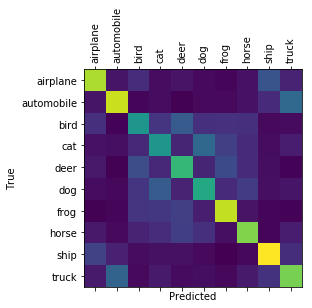

In [90]:
conf_mx=confusion_matrix( t, y_test_pred)
print(conf_mx)

labels =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
ticks=(np.arange(10))

fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(conf_mx)
plt.xticks(ticks,labels, rotation=90)

plt.yticks(ticks,labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
